### Import Libraries

In [38]:
import numpy as np  #linear algebra
import pandas as pd #Data processing - input and output load
import matplotlib.pyplot as plt # Visualization & plotting
import seaborn as sns

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [40]:
import wandb
import random
import pickle

### Importing Data

In [41]:
db = pd.read_csv("bhutan_landslide_data.csv")
db.head()

,FID,Type,Code,Lithology,Altitude,Slope,Total curvature,Aspect,Distance to road,Distance to stream,Slope length,TWI,STI
0,0,slide,1,1,1,2,1,7,1,5,2,4,1
1,1,slide,1,1,1,3,1,4,2,2,2,5,1
2,2,slide,1,1,1,2,3,7,1,1,1,3,0
3,3,slide,1,1,1,3,1,10,1,2,2,4,0
4,4,slide,1,1,1,3,1,10,1,4,3,5,0


In [42]:
db.describe(include='all')

,FID,Type,Code,Lithology,Altitude,Slope,Total curvature,Aspect,Distance to road,Distance to stream,Slope length,TWI,STI
count,1221.000000,1221,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.00000,1221.000000,1221.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,slide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,610.000000,NaN,0.779689,5.764128,2.974611,2.756757,1.918100,6.017199,2.189189,2.520885,1.90172,1.646192,0.553645
std,352.616647,NaN,0.414626,2.868150,1.190197,0.906605,0.953772,2.289076,1.409365,1.250809,0.85995,1.921653,0.663903
min,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000
25%,305.000000,NaN,1.000000,4.000000,2.000000,2.000000,1.000000,4.000000,1.000000,1.000000,1.00000,0.000000,0.000000
50%,610.000000,NaN,1.000000,8.000000,3.000000,3.000000,2.000000,6.000000,2.000000,2.000000,2.00000,0.000000,0.000000
75%,915.000000,NaN,1.000000,8.000000,4.000000,3.000000,3.000000,8.000000,3.000000,3.000000,2.00000,3.000000,1.000000


In [43]:
db.isna().sum()

FID                   0
Type                  0
Code                  0
Lithology             0
Altitude              0
Slope                 0
Total curvature       0
Aspect                0
Distance to road      0
Distance to stream    0
Slope length          0
TWI                   0
STI                   0
dtype: int64

In [44]:
db.shape

(1221, 13)

In [45]:
db.columns

Index(['FID', 'Type', 'Code', 'Lithology', 'Altitude', 'Slope',
       'Total curvature', 'Aspect', 'Distance to road', 'Distance to stream',
       'Slope length', 'TWI', 'STI'],
      dtype='object')

In [46]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FID                 1221 non-null   int64 
 1   Type                1221 non-null   object
 2   Code                1221 non-null   int64 
 3   Lithology           1221 non-null   int64 
 4   Altitude            1221 non-null   int64 
 5   Slope               1221 non-null   int64 
 6   Total curvature     1221 non-null   int64 
 7   Aspect              1221 non-null   int64 
 8   Distance to road    1221 non-null   int64 
 9   Distance to stream  1221 non-null   int64 
 10  Slope length        1221 non-null   int64 
 11  TWI                 1221 non-null   int64 
 12  STI                 1221 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 124.1+ KB


<Axes: >

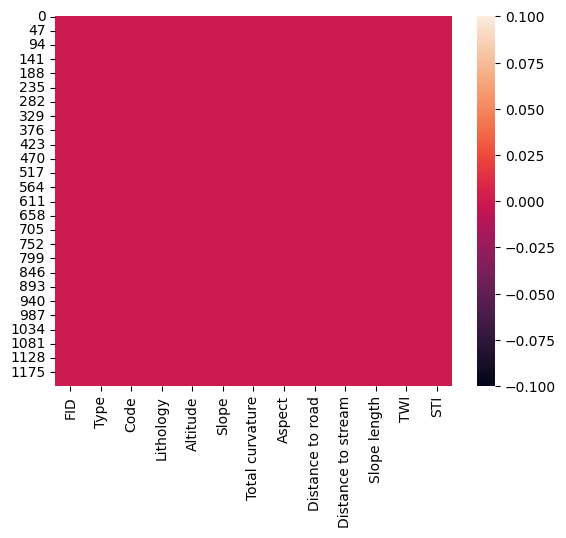

In [47]:

sns.heatmap(db.isnull())

In [48]:
numerical = db.select_dtypes(include=['int64','float64','Int64'])
numerical.dtypes

FID                   int64
Code                  int64
Lithology             int64
Altitude              int64
Slope                 int64
Total curvature       int64
Aspect                int64
Distance to road      int64
Distance to stream    int64
Slope length          int64
TWI                   int64
STI                   int64
dtype: object

In [49]:
db['Type'].map({"slide": 0, "nonslide": 1})

0       0
1       0
2       0
3       0
4       0
       ..
1216    0
1217    0
1218    0
1219    0
1220    0
Name: Type, Length: 1221, dtype: int64

### Feature Engineering

In [50]:
db.corr()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10420\2287404026.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  db.corr()


,FID,Code,Lithology,Altitude,Slope,Total curvature,Aspect,Distance to road,Distance to stream,Slope length,TWI,STI
FID,1.000000,0.017778,0.578871,0.696816,0.049388,0.024942,-0.066980,0.327608,-0.065144,0.054392,-0.000360,0.023809
Code,0.017778,1.000000,0.074819,0.159737,0.044849,0.037244,0.011768,0.448707,-0.105707,0.042673,0.008051,-0.044873
Lithology,0.578871,0.074819,1.000000,0.536342,0.073430,0.036979,-0.010868,0.205915,-0.047977,0.072014,-0.020954,0.019564
Altitude,0.696816,0.159737,0.536342,1.000000,0.042888,0.034270,-0.001946,0.486630,0.161955,0.023187,-0.039769,0.002244
Slope,0.049388,0.044849,0.073430,0.042888,1.000000,-0.008839,-0.000352,0.044385,-0.092736,0.429805,-0.000038,0.018292
Total curvature,0.024942,0.037244,0.036979,0.034270,-0.008839,1.000000,-0.017375,0.082271,-0.034980,-0.269656,-0.151778,-0.026712
Aspect,-0.066980,0.011768,-0.010868,-0.001946,-0.000352,-0.017375,1.000000,0.020841,-0.011720,0.026676,0.004925,-0.039711
Distance to road,0.327608,0.448707,0.205915,0.486630,0.044385,0.082271,0.020841,1.000000,-0.023399,-0.013727,-0.034584,-0.025310
Distance to stream,-0.065144,-0.105707,-0.047977,0.161955,-0.092736,-0.034980,-0.011720,-0.023399,1.000000,-0.123064,-0.053873,0.014690
Slope length,0.054392,0.042673,0.072014,0.023187,0.429805,-0.269656,0.026676,-0.013727,-0.123064,1.000000,0.211570,0.177218


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Distance to road'),
  Text(1, 0, 'Altitude'),
  Text(2, 0, 'Aspect'),
  Text(3, 0, 'Distance to stream'),
  Text(4, 0, 'Lithology'),
  Text(5, 0, 'Slope'),
  Text(6, 0, 'TWI'),
  Text(7, 0, 'Slope length'),
  Text(8, 0, 'Total curvature'),
  Text(9, 0, 'STI')])

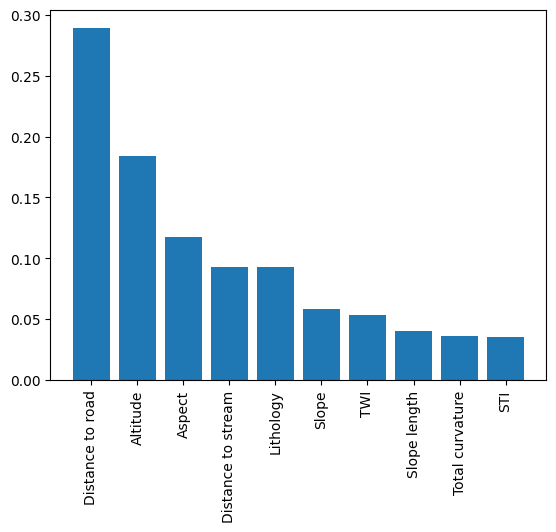

In [51]:
# Split the data into features and target variable
X = db.drop(['FID', 'Type','Code'], axis=1)
y = db['Type']

# Initialize a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Fit the classifier to the data
rf.fit(X, y)

# Get feature importances and sort them in descending order
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot the feature importances
plt.bar(feature_importances.index, feature_importances.values)
plt.xticks(rotation=90)


In [52]:
# Drop unimportant features based on feature importances
db.drop(['TWI','STI','Slope','Slope length', 'Total curvature'], axis=1, inplace=True)

### EDA

<Axes: xlabel='Type', ylabel='Altitude'>

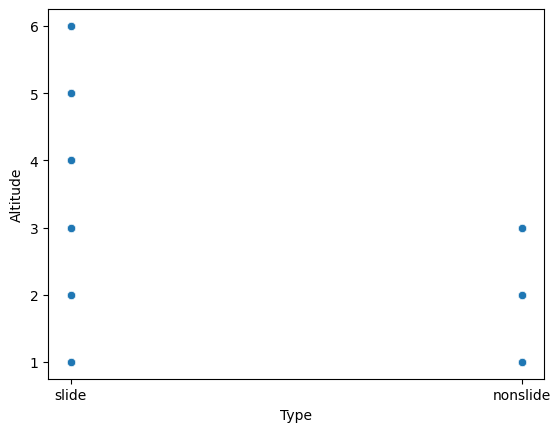

In [53]:
sns.scatterplot(x='Type', y='Altitude', data=db)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10420\667938199.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(db.corr(), cmap='coolwarm')


<Axes: >

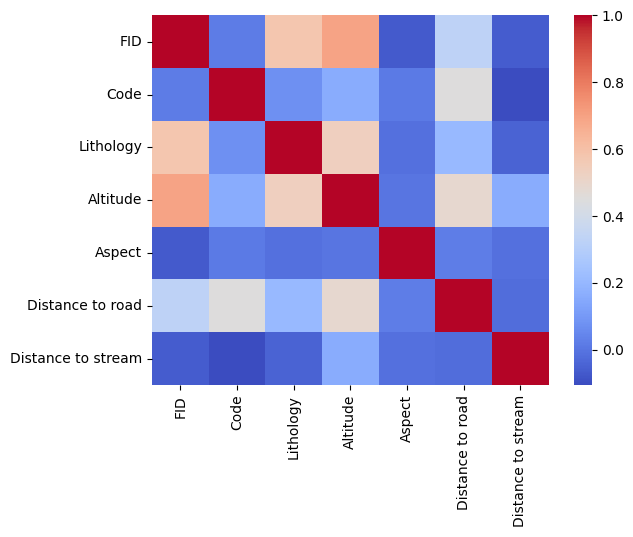

In [54]:
sns.heatmap(db.corr(), cmap='coolwarm')

### Train ML model

In [55]:
# Split the data into features and target variable
X = db.drop(['Type','Code','FID'], axis=1)
y = db['Code']

In [56]:
X.columns

Index(['Lithology', 'Altitude', 'Aspect', 'Distance to road',
       'Distance to stream'],
      dtype='object')

In [57]:
# Split the data into train, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42, stratify=y_train) #stratify is used for keepting the percentage ratio same while taking sampled from testing

In [58]:
db['Code'].value_counts(normalize=True)

1    0.779689
0    0.220311
Name: Code, dtype: float64

In [59]:
pd.DataFrame(y_train).value_counts(normalize=True)

Code
1       0.779859
0       0.220141
dtype: float64

In [60]:
pd.DataFrame(y_val).value_counts(normalize=True)

Code
1       0.778689
0       0.221311
dtype: float64

In [61]:
pd.DataFrame(y_test).value_counts(normalize=True)

Code
1       0.779592
0       0.220408
dtype: float64

In [62]:
# Initialize and train the machine learning models
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [63]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

SVC(random_state=42)

In [64]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
pickle.dump(rf,open('LandslideRF.pkl','wb'))

In [66]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [67]:
nn = MLPClassifier(random_state=42)
nn.fit(X_train, y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [68]:
val_accuracy = []
for model in [lr, svm, rf, xgb, nn]:
    val_accuracy.append(accuracy_score(y_val, model.predict(X_val)))

In [69]:
# Print the validation accuracy for each model
print('Logistic Regression validation accuracy:', val_accuracy[0])
print('SVM validation accuracy:', val_accuracy[1])
print('Random Forest validation accuracy:', val_accuracy[2])
print('XGBoost validation accuracy:', val_accuracy[3])
print('Neural Network validation accuracy:', val_accuracy[4])

Logistic Regression validation accuracy: 0.7131147540983607
SVM validation accuracy: 0.8442622950819673
Random Forest validation accuracy: 0.8770491803278688
XGBoost validation accuracy: 0.8688524590163934
Neural Network validation accuracy: 0.7950819672131147


In [70]:
Logacc = accuracy_score(y_val, lr.predict(X_val))
SVMacc = accuracy_score(y_val, svm.predict(X_val))
RFCacc = accuracy_score(y_val, rf.predict(X_val))
XGacc = accuracy_score(y_val, xgb.predict(X_val))
NNBacc = accuracy_score(y_val, nn.predict(X_val))

### Monitor model training on Weights and Bias

In [71]:
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: kuensolanin. Use `wandb login --relogin` to force relogin


True

In [72]:
# Initialize a new W&B run
wandb.init(project='landslide-prediction')

In [73]:
wandb.log({
'Log Acc':Logacc,
'SVM Acc':SVMacc,
'RFC Acc':RFCacc,
'XGB Acc':XGacc,
'NNB Acc':NNBacc
})

# Use W&B's visualization tools to explore the results
wandb.finish()

Log Acc,▁
NNB Acc,▁
RFC Acc,▁
SVM Acc,▁
XGB Acc,▁
Log Acc,0.71311
NNB Acc,0.79508
RFC Acc,0.87705
SVM Acc,0.84426
XGB Acc,0.86885


test

In [82]:
import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler

pickle_in = open('LandslideRF.pkl', 'rb')
model = pickle.load(pickle_in)

In [80]:
model.feature_names_in_

array(['Lithology', 'Altitude', 'Aspect', 'Distance to road',
       'Distance to stream'], dtype=object)

In [83]:
pickle_in.close()